# imports

In [1]:
import sys
sys.path.append('../src/')

from collections import OrderedDict
import torch

from data import get_loader
from filters import kalman_filter
from models import CNN
from utils import draw_weights, init_model, plot_density, plot_training, validate

# config

In [2]:
batch_size = 256
dataset = 'mnist'
epochs = 20
learning_rate = 1e-1
log_intv = 50

device = torch.device('cuda:0')

# dataloader and model

In [3]:
trainloader = get_loader(dataset, batch_size, train=True)
testloader = get_loader(dataset, batch_size, train=False)

model = CNN().to(device)
init_model(model)

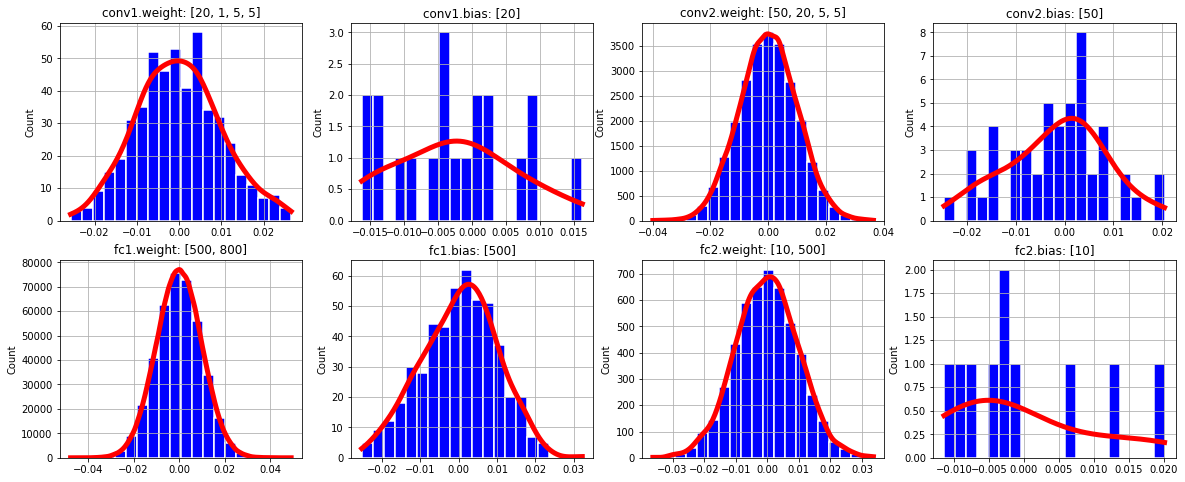

In [4]:
plot_density(model, bins=20)

# training

In [5]:
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.CrossEntropyLoss().to(device)

- $\mu_k(0)$ and $\sigma_k(0)$ is initialized for the model
- Also, initialize estimate covariances $P_{\mu}(0)$ and $P_{\sigma}(0)$
- Initialize small values of $\sigma_{\mu}$, $\tilde{\sigma}_{\mu}$, $\sigma_{\sigma}$, $\tilde{\sigma}_{\sigma}$

In [6]:
std_mu = 1e-4
std_mu_ = 1e-4
std_var = 1e-4
std_var_ = 1e-4

In [7]:
model_mu = OrderedDict()
model_var = OrderedDict()
P_mu = OrderedDict()
P_var = OrderedDict()

for name, param in model.named_parameters():
    model_mu[name] = torch.zeros(param.size())
    model_var[name] = torch.ones(param.size())*(0.01**2)
    
    P_mu[name] = torch.zeros(param.size())
    P_var[name] = torch.zeros(param.size())

[epoch:   1, batch:    0] loss: 2.302785 	 acc: 0.12
[epoch:   1, batch:   50] loss: 2.302012 	 acc: 0.11
[epoch:   1, batch:  100] loss: 2.300152 	 acc: 0.11
[epoch:   1, batch:  150] loss: 2.284650 	 acc: 0.18
[epoch:   1, batch:  200] loss: 1.422152 	 acc: 0.57


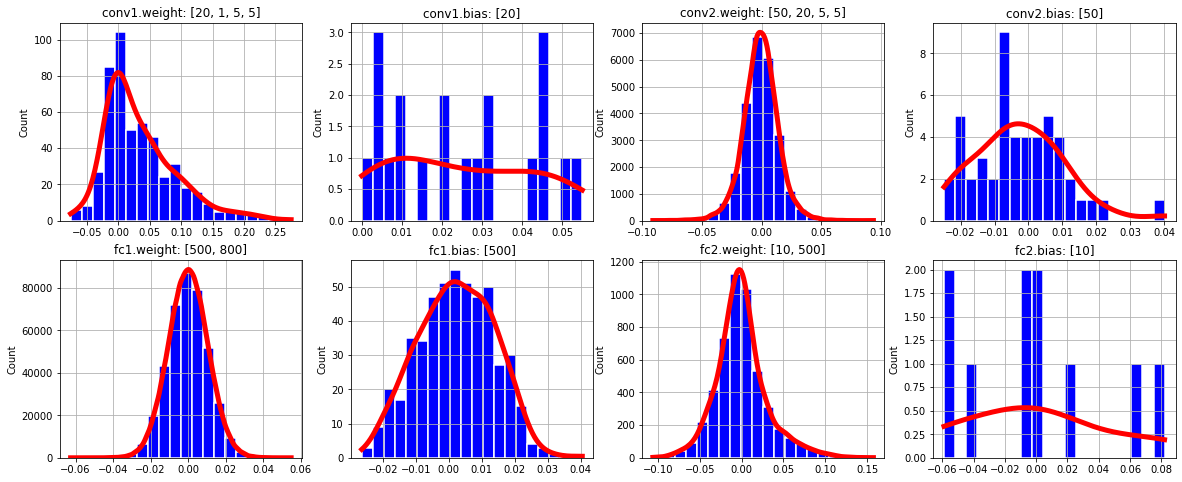

[epoch:   2, batch:    0] loss: 0.351867 	 acc: 0.89
[epoch:   2, batch:   50] loss: 0.257407 	 acc: 0.92
[epoch:   2, batch:  100] loss: 0.182941 	 acc: 0.94
[epoch:   2, batch:  150] loss: 0.157599 	 acc: 0.95
[epoch:   2, batch:  200] loss: 0.127091 	 acc: 0.96


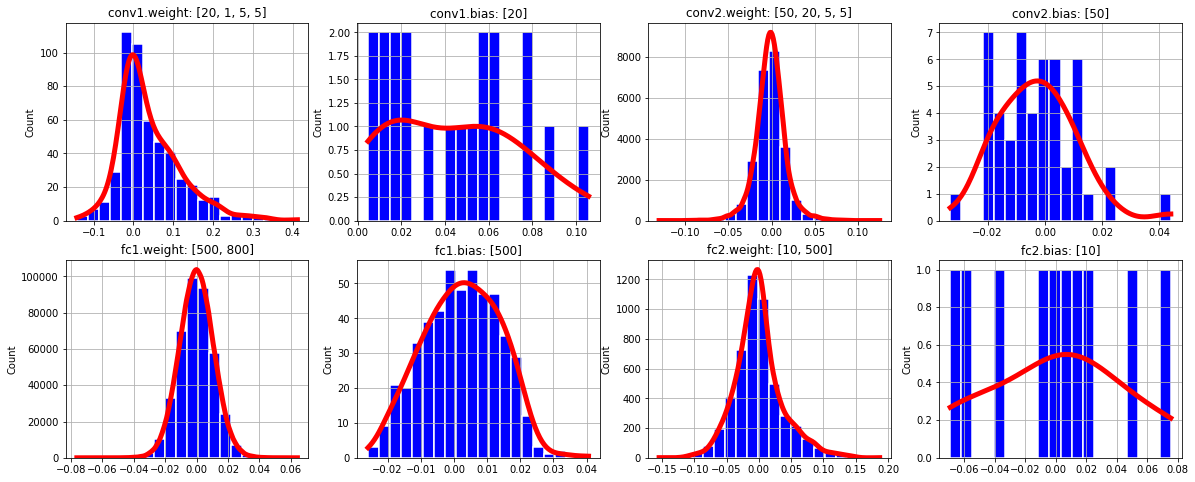

[epoch:   3, batch:    0] loss: 0.152101 	 acc: 0.95
[epoch:   3, batch:   50] loss: 0.102059 	 acc: 0.97
[epoch:   3, batch:  100] loss: 0.095120 	 acc: 0.97
[epoch:   3, batch:  150] loss: 0.085866 	 acc: 0.97
[epoch:   3, batch:  200] loss: 0.075352 	 acc: 0.98


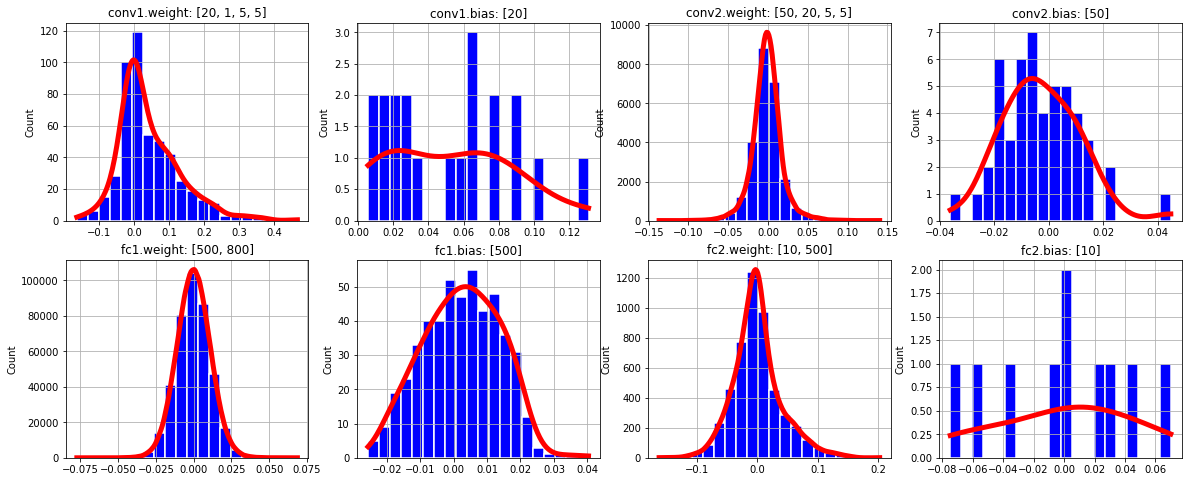

[epoch:   4, batch:    0] loss: 0.070021 	 acc: 0.98
[epoch:   4, batch:   50] loss: 0.065033 	 acc: 0.98
[epoch:   4, batch:  100] loss: 0.068827 	 acc: 0.98
[epoch:   4, batch:  150] loss: 0.054939 	 acc: 0.98
[epoch:   4, batch:  200] loss: 0.061222 	 acc: 0.98


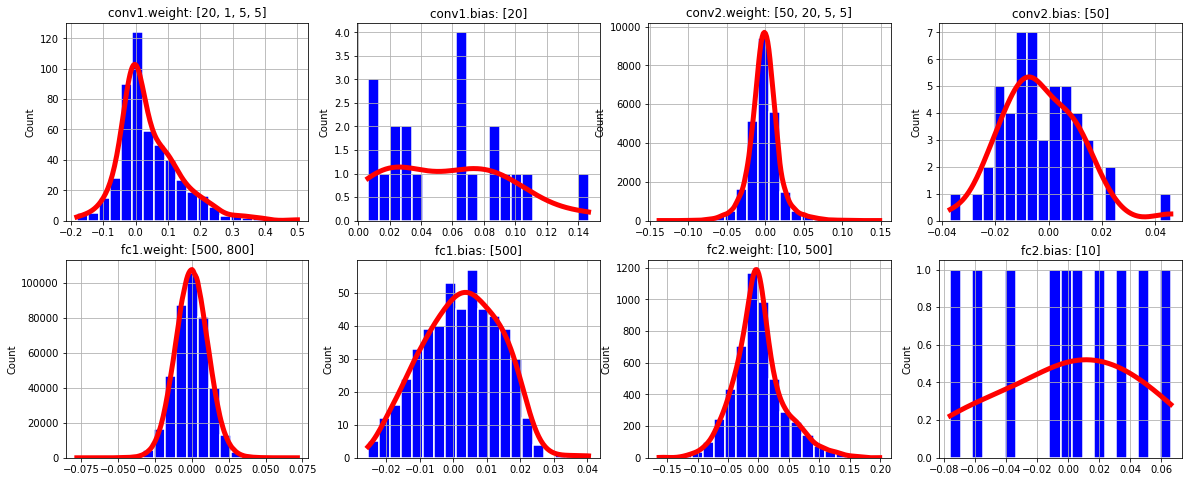

[epoch:   5, batch:    0] loss: 0.069685 	 acc: 0.97
[epoch:   5, batch:   50] loss: 0.055342 	 acc: 0.98
[epoch:   5, batch:  100] loss: 0.051432 	 acc: 0.98
[epoch:   5, batch:  150] loss: 0.050969 	 acc: 0.98
[epoch:   5, batch:  200] loss: 0.050797 	 acc: 0.98


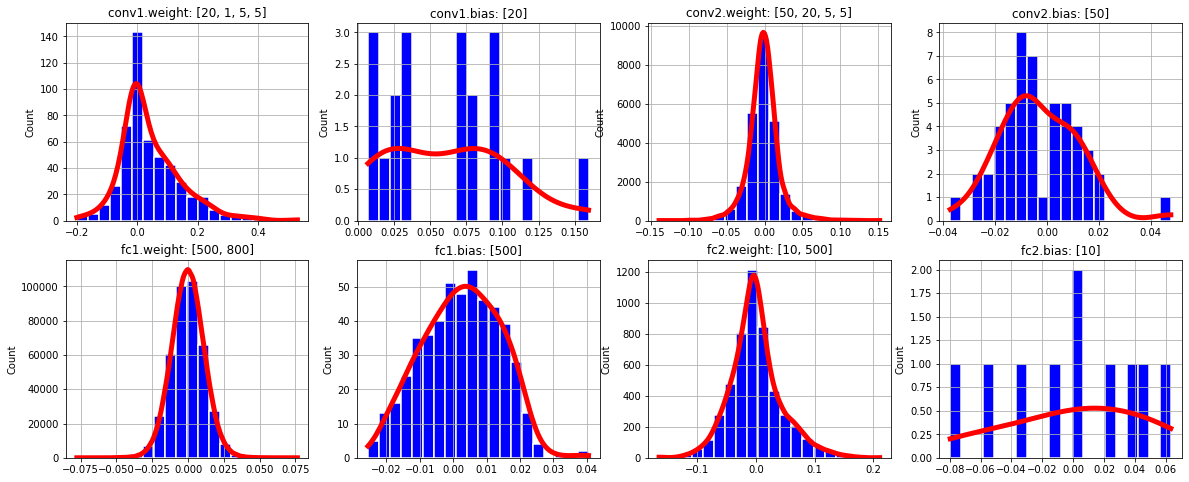

[epoch:   6, batch:    0] loss: 0.046364 	 acc: 0.97
[epoch:   6, batch:   50] loss: 0.038295 	 acc: 0.99
[epoch:   6, batch:  100] loss: 0.048126 	 acc: 0.98
[epoch:   6, batch:  150] loss: 0.038216 	 acc: 0.99
[epoch:   6, batch:  200] loss: 0.042645 	 acc: 0.99


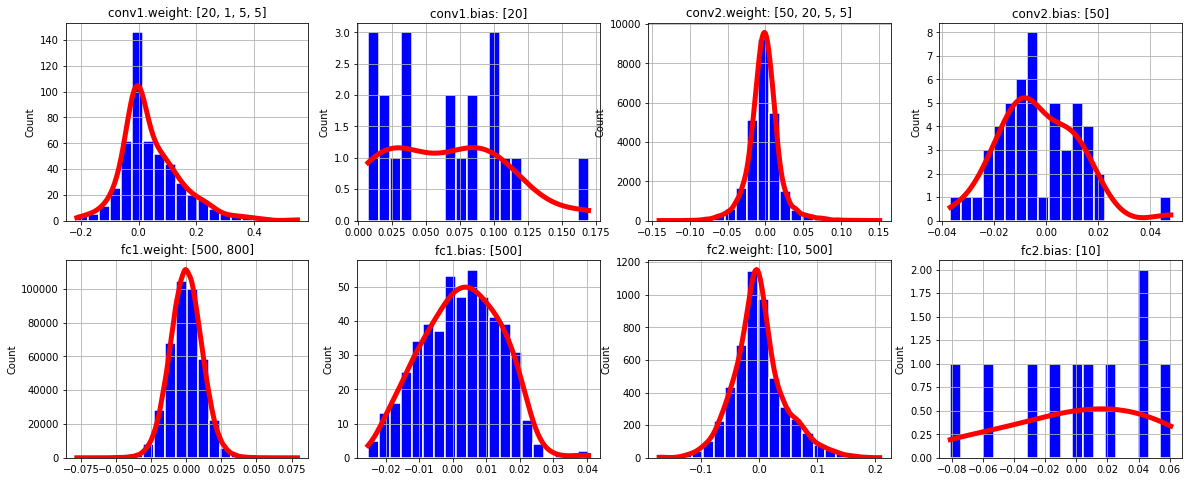

[epoch:   7, batch:    0] loss: 0.054606 	 acc: 0.98
[epoch:   7, batch:   50] loss: 0.032830 	 acc: 0.99
[epoch:   7, batch:  100] loss: 0.036033 	 acc: 0.99
[epoch:   7, batch:  150] loss: 0.038360 	 acc: 0.99
[epoch:   7, batch:  200] loss: 0.033008 	 acc: 0.99


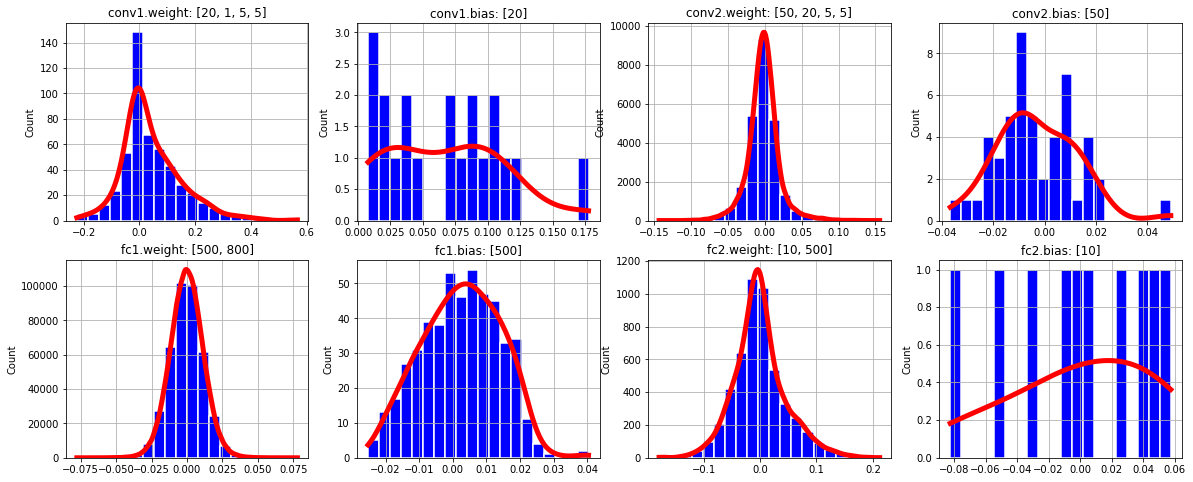

[epoch:   8, batch:    0] loss: 0.044522 	 acc: 0.98
[epoch:   8, batch:   50] loss: 0.029855 	 acc: 0.99
[epoch:   8, batch:  100] loss: 0.030040 	 acc: 0.99
[epoch:   8, batch:  150] loss: 0.033456 	 acc: 0.99
[epoch:   8, batch:  200] loss: 0.032820 	 acc: 0.99


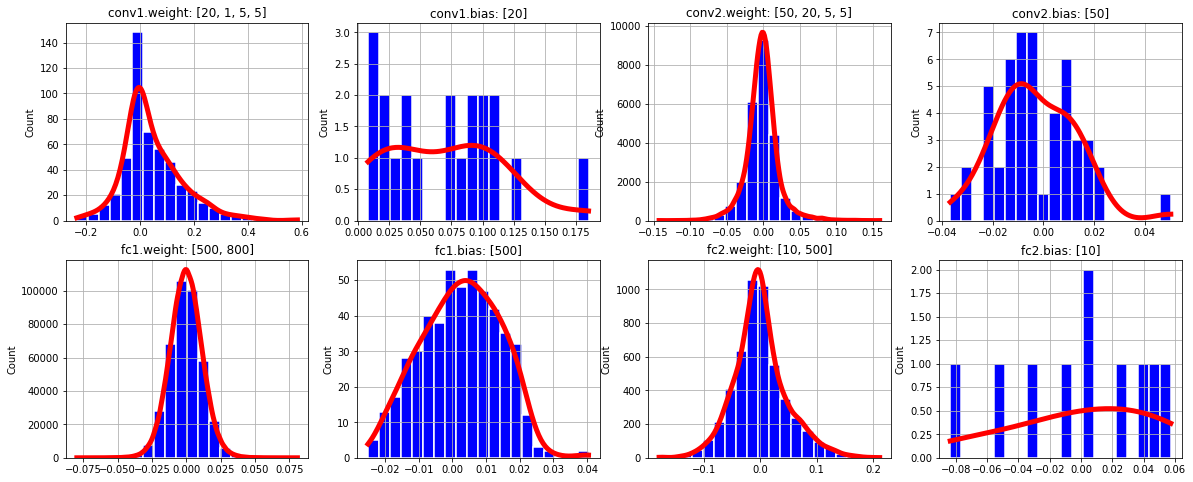

[epoch:   9, batch:    0] loss: 0.034744 	 acc: 1.00
[epoch:   9, batch:   50] loss: 0.025473 	 acc: 0.99
[epoch:   9, batch:  100] loss: 0.025704 	 acc: 0.99
[epoch:   9, batch:  150] loss: 0.026354 	 acc: 0.99
[epoch:   9, batch:  200] loss: 0.026981 	 acc: 0.99


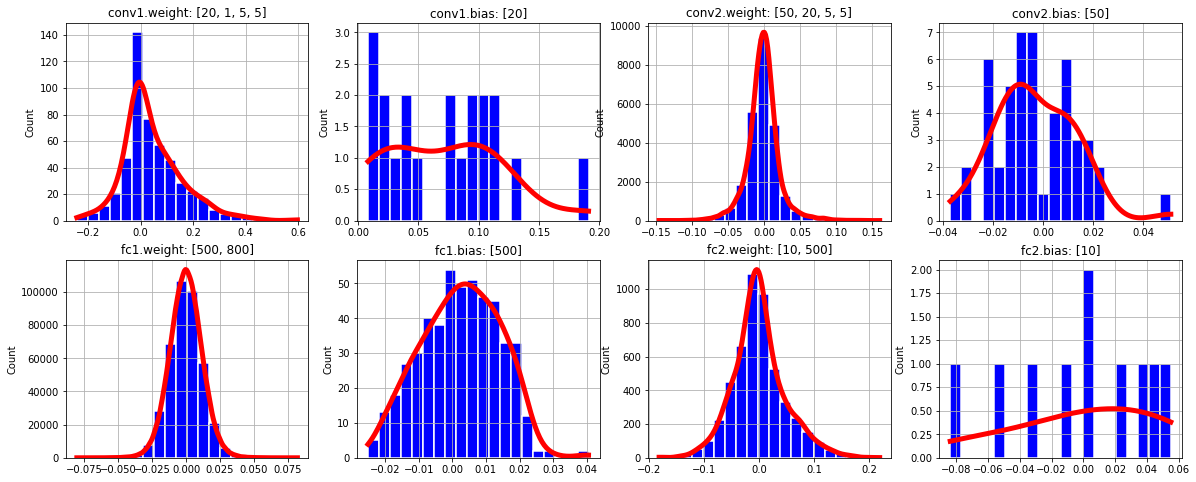

[epoch:  10, batch:    0] loss: 0.025335 	 acc: 0.99
[epoch:  10, batch:   50] loss: 0.024352 	 acc: 0.99
[epoch:  10, batch:  100] loss: 0.024528 	 acc: 0.99
[epoch:  10, batch:  150] loss: 0.022499 	 acc: 0.99
[epoch:  10, batch:  200] loss: 0.020879 	 acc: 0.99


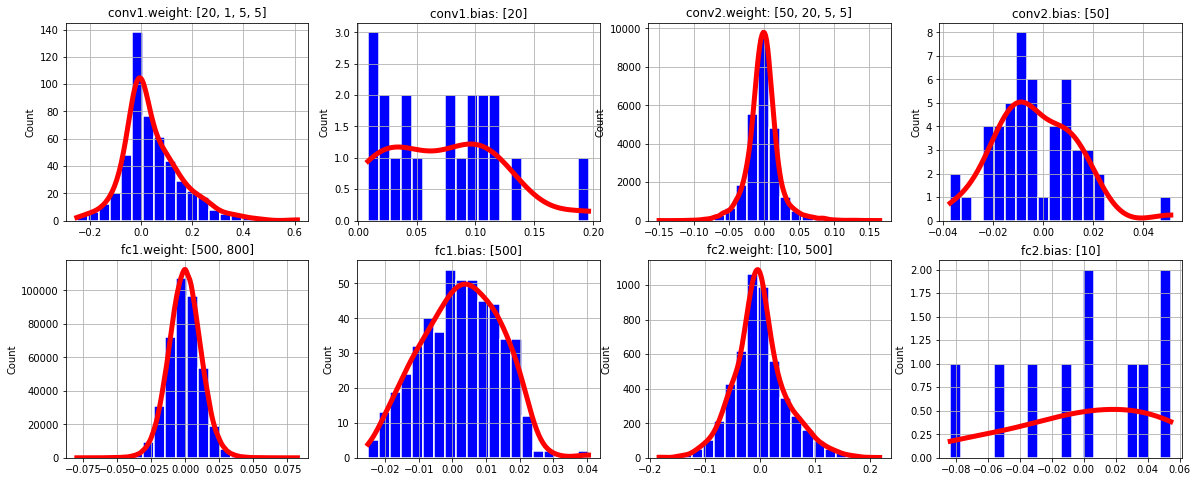

[epoch:  11, batch:    0] loss: 0.046865 	 acc: 0.98
[epoch:  11, batch:   50] loss: 0.022871 	 acc: 0.99
[epoch:  11, batch:  100] loss: 0.018331 	 acc: 0.99
[epoch:  11, batch:  150] loss: 0.020989 	 acc: 0.99
[epoch:  11, batch:  200] loss: 0.021148 	 acc: 0.99


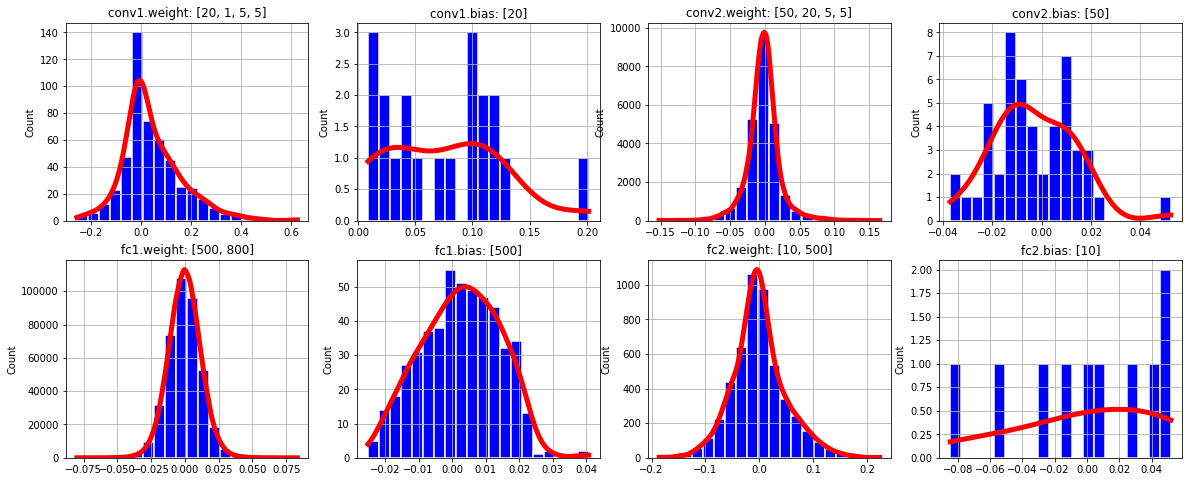

[epoch:  12, batch:    0] loss: 0.038347 	 acc: 0.99
[epoch:  12, batch:   50] loss: 0.016452 	 acc: 1.00
[epoch:  12, batch:  100] loss: 0.019657 	 acc: 0.99
[epoch:  12, batch:  150] loss: 0.016354 	 acc: 1.00
[epoch:  12, batch:  200] loss: 0.019696 	 acc: 0.99


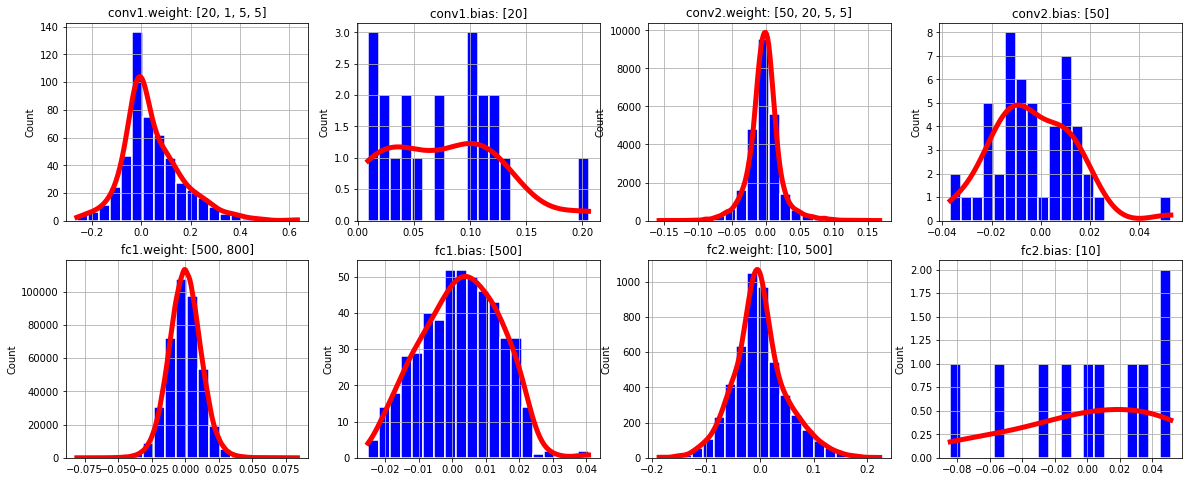

[epoch:  13, batch:    0] loss: 0.037324 	 acc: 0.99
[epoch:  13, batch:   50] loss: 0.014220 	 acc: 1.00
[epoch:  13, batch:  100] loss: 0.017238 	 acc: 1.00
[epoch:  13, batch:  150] loss: 0.064756 	 acc: 0.98
[epoch:  13, batch:  200] loss: 0.022026 	 acc: 0.99


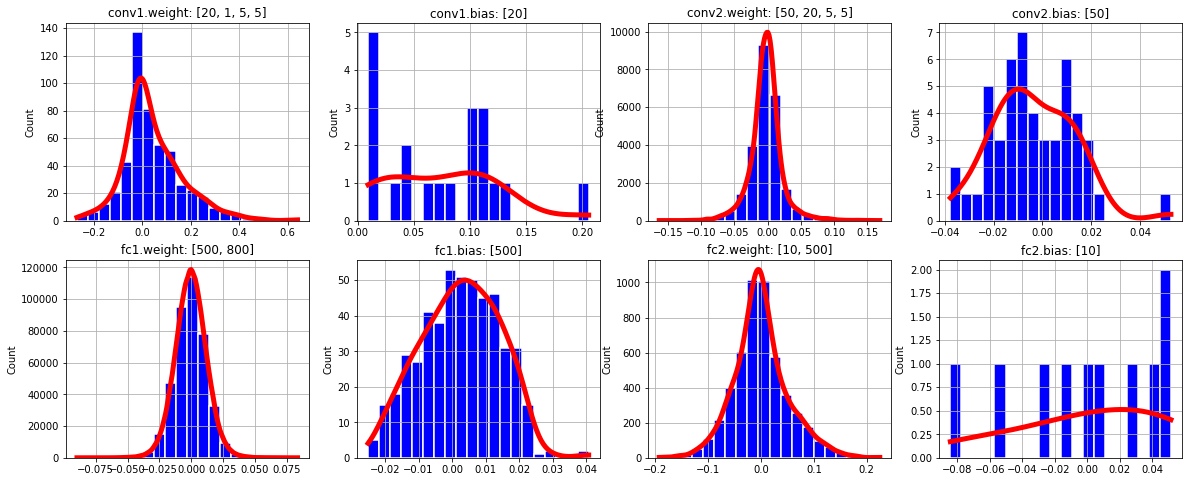

[epoch:  14, batch:    0] loss: 0.006470 	 acc: 1.00
[epoch:  14, batch:   50] loss: 0.013787 	 acc: 1.00
[epoch:  14, batch:  100] loss: 0.014589 	 acc: 1.00
[epoch:  14, batch:  150] loss: 0.017825 	 acc: 0.99
[epoch:  14, batch:  200] loss: 0.012843 	 acc: 1.00


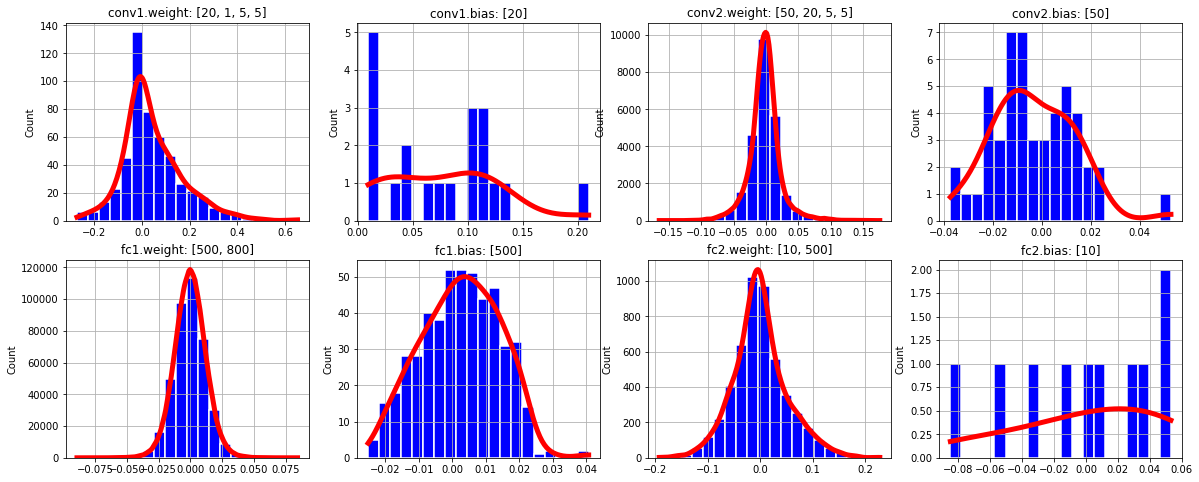

[epoch:  15, batch:    0] loss: 0.004119 	 acc: 1.00
[epoch:  15, batch:   50] loss: 0.011529 	 acc: 1.00
[epoch:  15, batch:  100] loss: 0.012953 	 acc: 1.00
[epoch:  15, batch:  150] loss: 0.014023 	 acc: 1.00
[epoch:  15, batch:  200] loss: 0.011570 	 acc: 1.00


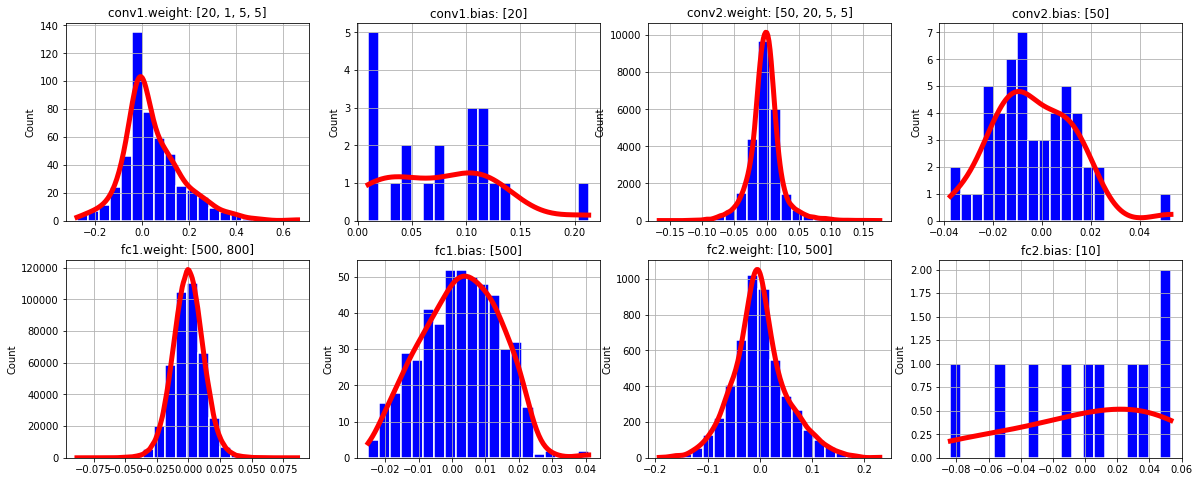

[epoch:  16, batch:    0] loss: 0.224288 	 acc: 0.95
[epoch:  16, batch:   50] loss: 0.064411 	 acc: 0.99
[epoch:  16, batch:  100] loss: 0.014826 	 acc: 1.00
[epoch:  16, batch:  150] loss: 0.014643 	 acc: 1.00
[epoch:  16, batch:  200] loss: 0.011786 	 acc: 1.00


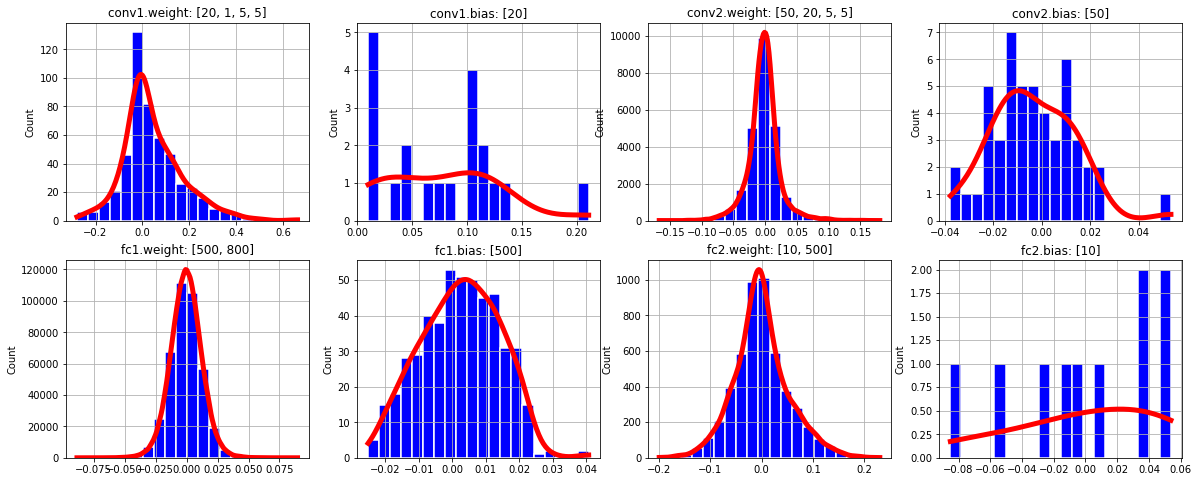

[epoch:  17, batch:    0] loss: 0.004685 	 acc: 1.00
[epoch:  17, batch:   50] loss: 0.009002 	 acc: 1.00
[epoch:  17, batch:  100] loss: 0.008355 	 acc: 1.00
[epoch:  17, batch:  150] loss: 0.012117 	 acc: 1.00
[epoch:  17, batch:  200] loss: 0.012718 	 acc: 1.00


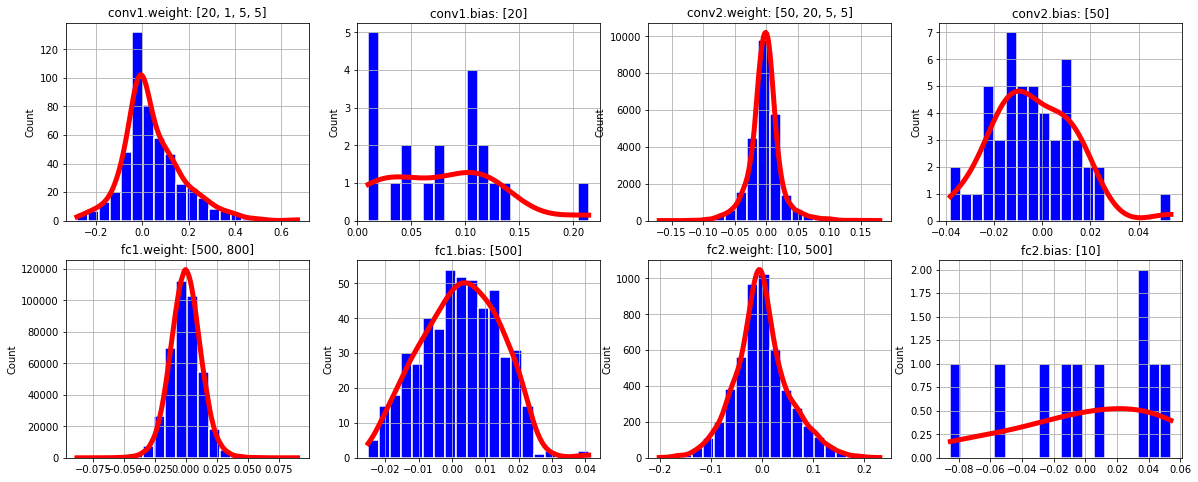

[epoch:  18, batch:    0] loss: 0.005196 	 acc: 1.00
[epoch:  18, batch:   50] loss: 0.009462 	 acc: 1.00
[epoch:  18, batch:  100] loss: 0.007533 	 acc: 1.00
[epoch:  18, batch:  150] loss: 0.009766 	 acc: 1.00
[epoch:  18, batch:  200] loss: 0.007875 	 acc: 1.00


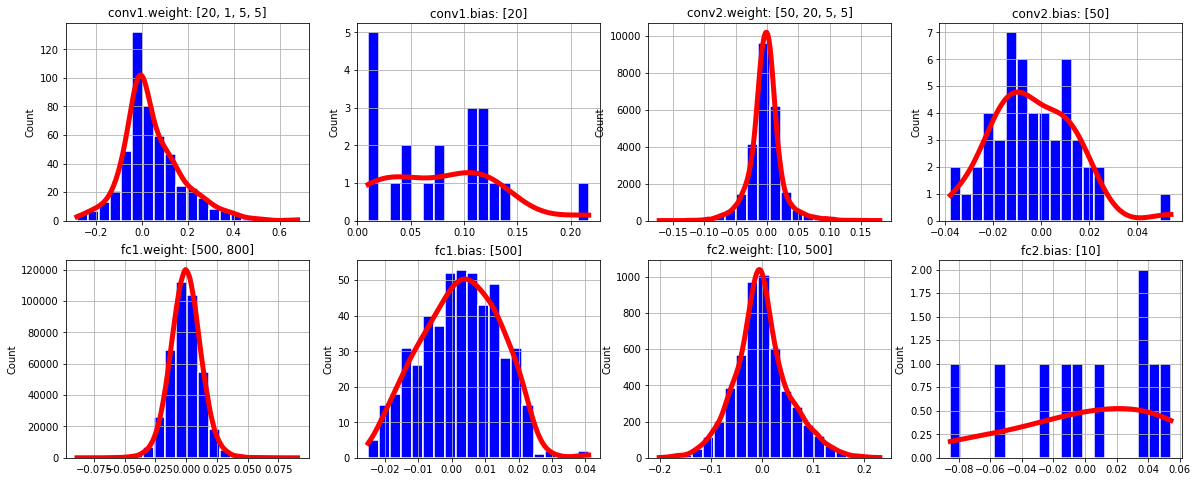

[epoch:  19, batch:    0] loss: 0.008421 	 acc: 1.00
[epoch:  19, batch:   50] loss: 0.005825 	 acc: 1.00
[epoch:  19, batch:  100] loss: 0.008660 	 acc: 1.00
[epoch:  19, batch:  150] loss: 0.008882 	 acc: 1.00
[epoch:  19, batch:  200] loss: 0.007823 	 acc: 1.00


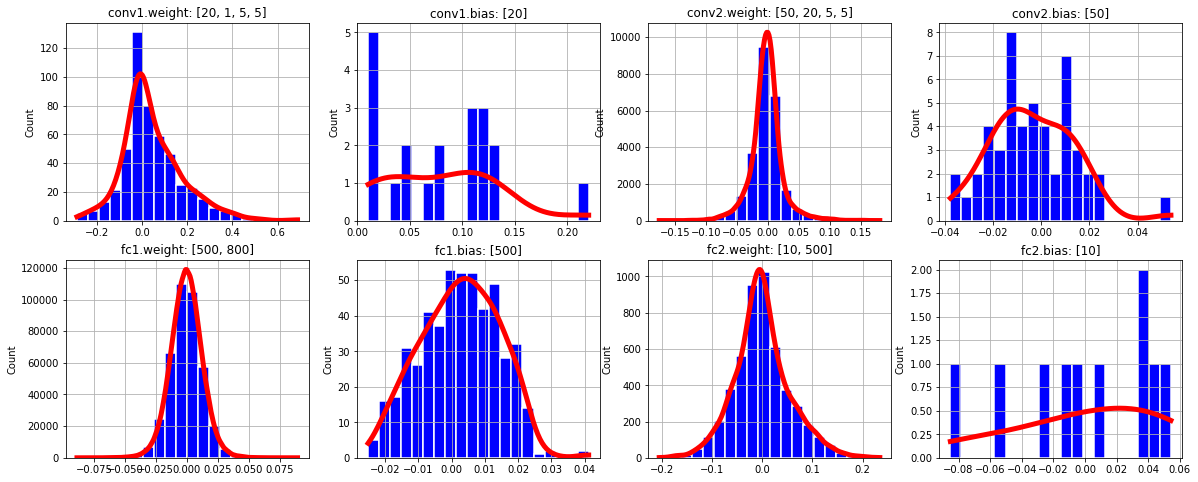

[epoch:  20, batch:    0] loss: 0.010327 	 acc: 1.00
[epoch:  20, batch:   50] loss: 0.005862 	 acc: 1.00
[epoch:  20, batch:  100] loss: 0.005723 	 acc: 1.00
[epoch:  20, batch:  150] loss: 0.005221 	 acc: 1.00
[epoch:  20, batch:  200] loss: 0.009753 	 acc: 1.00


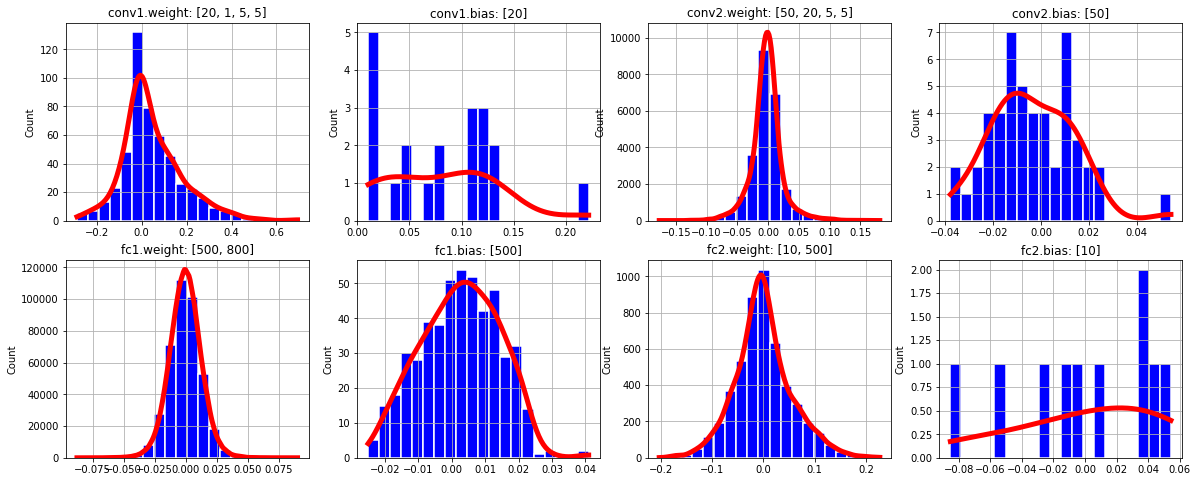

In [8]:
h_epoch, h_acc, h_loss = [], [], []
for epoch in range(1, epochs+1):
    
    running_loss = 0.0
    running_acc = 0.0
    running_count = 0
    epoch_loss = 0
    epoch_acc = 0
    for i, (Y, X) in enumerate(trainloader):
        Y, X = Y.to(device), X.to(device)
        
        X_ = model(Y)
        loss = loss_fn(X_, X)
        running_loss += loss.item()
        optim.zero_grad()
        loss.backward()
        optim.step()
        pred = X_.argmax(axis=1, keepdim=True)
        running_acc += pred.eq(X.view_as(pred)).sum().item()/len(X)
        running_count += 1
        
        # logging
        if i % log_intv == 0:
            epoch_loss = running_loss/running_count
            epoch_acc = running_acc/running_count
            print('[epoch: {:3d}, batch: {:4d}] loss: {:.6f} \t acc: {:.2f}'.format(
                epoch, i, epoch_loss, epoch_acc))
            running_loss = 0.0
            running_acc = 0.0
            running_count = 0 
            
        # kalman filtering
        model_mu, model_var, P_mu, P_var = kalman_filter(
            model, learning_rate, 
            model_mu, model_var, P_mu, P_var,
            std_mu, std_mu_, std_var, std_var_
        )

    h_epoch.append(epoch)
    h_acc.append(epoch_acc)
    h_loss.append(epoch_loss)
    plot_density(model, bins=20)

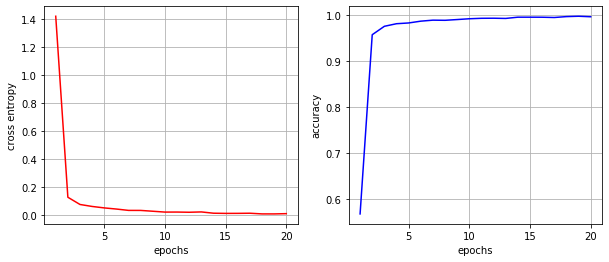

In [9]:
plot_training(h_epoch, h_acc, h_loss)

# validate training

In [10]:
validate(model, testloader, device)

0.988

# draw model

In [11]:
drawn_weights = draw_weights(model_mu, model_var, device)
drawn_model = CNN().to(device)
drawn_model.load_state_dict(drawn_weights)

<All keys matched successfully>

In [12]:
validate(drawn_model, testloader, device)

0.9883